# Ejemplo 4: Describiendo histogramas

## 1. Objetivos:
- Aprender algunos términos importantes para describir nuestros histogramas
 
---
    
## 2. Desarrollo:

In [43]:
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis
import pandas as pd

sns.set_style('white')

Vamos a ver algunas formas comunes que pueden tener nuestros histogramas. Normalmente las gráficas que obtengamos con datos provenientes del mundo real no encajan a la perfección con estas formas, pero ayuda tener referencias para poder describir nuestras gráficas.

Solemos describir nuestros datos utilizando dos parámetros: asimetría y curtosis.

#### a) Asimetría (skewness)

La asimetría nos da una medida de la falta de simetría en una distribución (duh). Una distribución es simétrica si se ve igual a la izquierda y derecha del punto central.

- Una asimetría de 0 indica que la simetría de la distribución es perfecta.

- Números positivos indican que hay una asimetría positiva, es decir que la cola de la derecha es más larga que la cola de la izquierda.

- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

#### b) Curtosis (kurtosis)

La curtosis es una medida de la dispersión de nuestros datos. La curtosis nos dice qué tan escarpada o achatada está nuestra distribución.

- Curtosis de 0 indica que la dispersión de nuestros datos es normal (más adelante aprenderemos exactamente qué significa esto).

- Curtosis positiva indica que nuestra distribución está achatada. Esto implica que hay más dispersión de nuestros datos, que están más lejanos de nuestro punto central y que por lo tanto tenemos colas largas (comparadas con la cola normal).

- Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).

No todas las técnicas para medida curtosis establecen la normalidad en 0, pero nosotros vamos a utilizar la default en `scipy` y `pandas`.

---

Para calcular las medidas de curtosis y asimetría usaremos los métodos `kurtosis` y `skew` de la librería `scipy.stats`.

Usando estas definiciones estamos listos para visualizar algunas distribuciones con características distintas:

### Distribución Normal (Standard Normal)

La distribución normal es una de las más famosas y más utilizadas. Muchos de los análisis estadísticos que hacemos toman a la distribución normal como un "estándar". Hay algunas medidas que incluso requieren que la distribución sea normal para funcionar. A través de este módulo nos toparemos varias veces con esta distribución y la exploraremos más a profundidad. Por el momento basta saber que la distribución normal tiene una asimetría de 0 y una curtosis de 0 (usando el método default de `scipy` y `pandas`.

Otra cosa interesante es que la distribución normal estándar tiene un promedio de 0, una mediana de 0, una moda de 0 y una desviación estándar de 1. Esto implica que el 68% de los datos están a 1 desviación estándar de la media y el 95% de los datos están a 2 desviaciones estándares de la media.

Esta distribución se ve así:

In [10]:
#simulo 10,000 datos (normales)

datos = np.random.normal(loc=0, scale=5, size=10000)

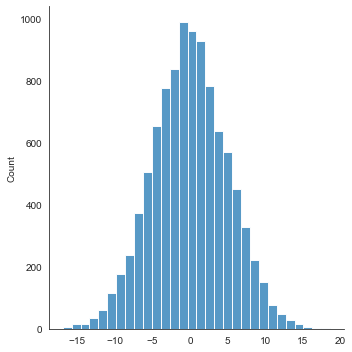

In [11]:
sns.displot(datos, kde=False, bins = 30);

In [12]:
#Calculemos la kurtosis y asimetría de estos datos

print(f'Curtosis: {kurtosis(datos)}')
print(f'Asimetría: {skew(datos)}')

Curtosis: -0.00677059549077752
Asimetría: 0.025840874939718414


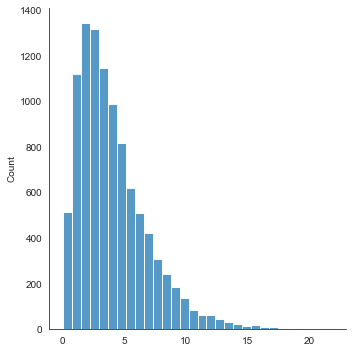

In [13]:
#Otros datos simulados
datos2 = np.random.chisquare(4, size=10000)
sns.displot(datos2, kde=False, bins = 30);

In [14]:
#Calculemos la kurtosis y asimetría de estos datos

print(f'Curtosis: {kurtosis(datos2)}')
print(f'Asimetría: {skew(datos2)}')

Curtosis: 2.5935854277734514
Asimetría: 1.361331662295023


#### Distribuciones de cola corta (short-tailed)

Las distribuciones de cola corta se concentran mucho en el punto central y casi no se extienden hacia los lados. Es raro en realidad encontrar distribuciones de cola corta, pero así se vería una:

In [15]:
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])

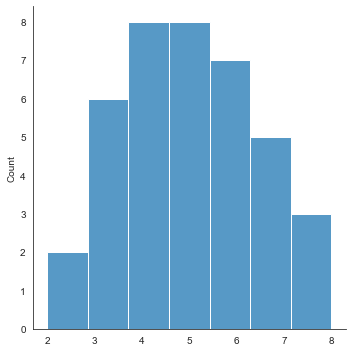

In [16]:
sns.displot(cola_corta, kde=False, bins=7);

In [7]:
print(f'Curtosis: {kurtosis(cola_corta)}')
print(f'Asimetría: {skew(cola_corta)}')

Curtosis: -0.8509615384615383
Asimetría: 0.10598753694734905


### Distribuciones de cola larga (fat-tailed)

Estas distribuciones se extienden mucho hacia los lados (o hacia uno de los dos lados) a partir del punto central. Muchos fenómenos naturales y sociales tienen distribuciones de cola larga.

In [17]:
# de nuevo simulé unos datos
cola_larga = np.random.laplace(loc=0.0, scale=1, size=10000)

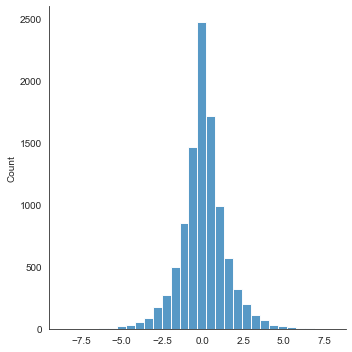

In [20]:
sns.displot(cola_larga, kde=False, bins= 30)

In [19]:
print(f'Curtosis: {kurtosis(cola_larga)}')
print(f'Asimetría: {skew(cola_larga)}')

Curtosis: 2.591975332633303
Asimetría: -0.019061429242479205


### Asimetría Positiva (right-skewed)

Las distribuciones con asimetría positiva tienen colas más largas hacia el lado derecho del punto central.

In [21]:
#genero otros números aletorios
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)

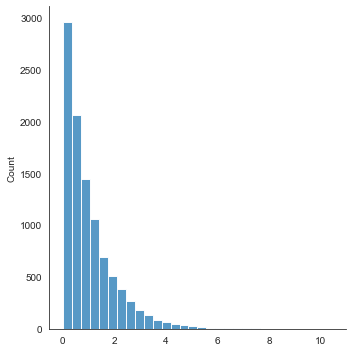

In [23]:
sns.displot(asimetria_positiva, kde=False, bins = 30)

In [24]:
print(f'Curtosis: {kurtosis(asimetria_positiva)}')
print(f'Asimetría: {skew(asimetria_positiva)}')

Curtosis: 6.713272138009675
Asimetría: 2.069537842619456


### Asimetría negativa (left-skewed)

Las distribuciones con asimetría negativa tienen colas más largas hacia el lado izquierdo del punto central.

In [25]:
# simulo más datos
asimetria_negativa = np.random.chisquare(4, size=10000) * -1

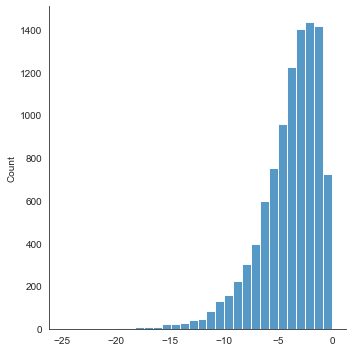

In [27]:
sns.displot(asimetria_negativa, kde=False, bins=30);

In [28]:
print(f'Curtosis: {kurtosis(asimetria_negativa)}')
print(f'Asimetría: {skew(asimetria_negativa)}')

Curtosis: 3.3375517818274574
Asimetría: -1.4637228990246287


Hay algunas distribuciones que tienen valores muy extremos tanto de curtosis como de asimetría:

In [31]:
# otros datos bien raros simulados
cauchy = np.random.standard_cauchy(size=10000)

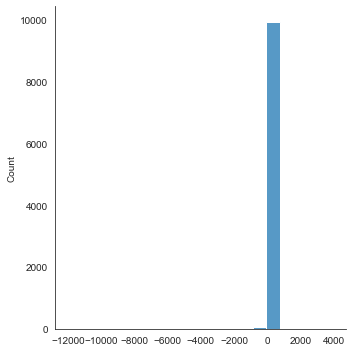

In [33]:
sns.displot(cauchy, kde=False, bins = 20)

In [34]:
print(f'Curtosis: {kurtosis(cauchy)}')
print(f'Asimetría: {skew(cauchy)}')

Curtosis: 3866.9888386131292
Asimetría: -53.1997053059593


### Distribución uniforme (uniform distribution)

Una distribución uniforme se genera cuando todos los valores tienen la misma probabilidad (o casi) de suceder. Esto genera una gráfica bastante plana en la parte superior que además tiene una curtosis negativa (porque tiene "colas" muy gruesas):

In [35]:
# simulo de la distribución uniforme
datos_uniform = np.random.uniform(low=-1, high=0, size=10000)

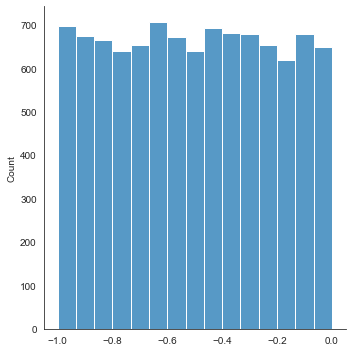

In [36]:
sns.displot(datos_uniform, bins=15, kde=False);

In [37]:
print(f'Curtosis: {kurtosis(datos_uniform)}')
print(f'Asimetría: {skew(datos_uniform)}')

Curtosis: -1.1907803188400987
Asimetría: 0.004699810639224695


### Distribución bimodal y multimodal

Hay veces que no tenemos un solo pico en nuestros datos. Puede suceder que haya dos o más concentraciones de valores en nuestros datos. A esto le llamamos distribuciones bimodales (cuando hay 2 concentraciones) y multimodales (cuando hay más de 2).

Debemos de ser muy cuidadosos al usar las medidas de curtosis y asimetría con este tipo de distribuciones, ya que pueden darnos ideas erróneas de lo que realmente está sucediendo.

In [38]:
# simulo unos datos
normal_left = np.random.normal(loc=-2.5, scale=1, size=10000)
normal_right = np.random.normal(loc=2.5, scale=1, size=10000)
bimodal = np.concatenate([normal_left, normal_right])

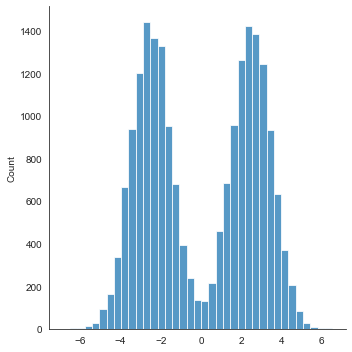

In [39]:
sns.displot(bimodal, kde=False);

In [41]:
# Se puede calcular kurtosis y asimetría pero no tiene sentido, pues hay dos pancitas

print(f'Curtosis: {kurtosis(bimodal)}')
print(f'Asimetría: {skew(bimodal)}')

Curtosis: -1.4936003107287892
Asimetría: -0.0018239910518297448


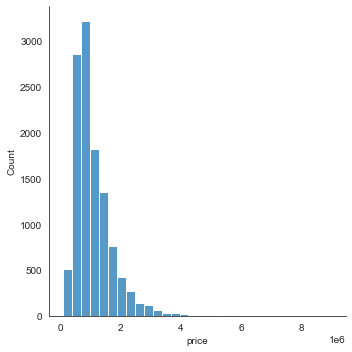

In [46]:
df = pd.read_csv('../../Datasets/melbourne_housing-clean.csv')
sns.displot(df['price'], kde=False, bins = 30);

In [50]:
datos = df['price']
print(f'Curtosis: {kurtosis(datos)}')
print(f'Asimetría: {skew(datos)}')

Curtosis: 10.142722702910373
Asimetría: 2.2687994701037613
